In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Fake Sensor Data

In [2]:
N_SAMPLES = 500      # num samples is 500

In [3]:
# Return evenly spaced numbers over a specified interval.
input_range = np.linspace(0, 2*np.pi, N_SAMPLES, dtype=np.double)

In [4]:
# Return a sin signal based on the data
signal = np.sin(input_range)

In [5]:
# Create unevenly spaced numbers over a specified interval as "noise".
noise = np.random.normal(0, 1, N_SAMPLES)

In [6]:
# Ensure the noise covers the desired range
assert noise.shape == input_range.shape

In [7]:
# Combine the signal and the noise to create a "noisy signal"
noisy_signal = signal + noise/5

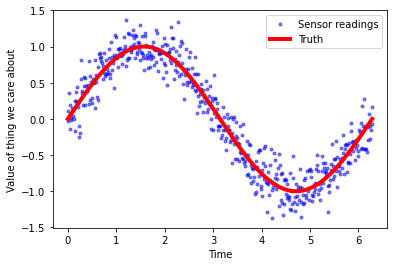

In [8]:
# Plot the data
plt.plot(input_range, noisy_signal, 'b.', alpha = 0.5)
plt.plot(input_range, signal, 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Truth'])
plt.xlabel('Time')
plt.ylabel('Value of thing we care about')
plt.show() # My plot will vary slightly, depending on the noise.

# Filtering Noise

In [9]:
del signal # Objective now is to reconstruct the sin wave from the noisy signal

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [11]:
filtered = lowess(noisy_signal, input_range, frac=0.1)

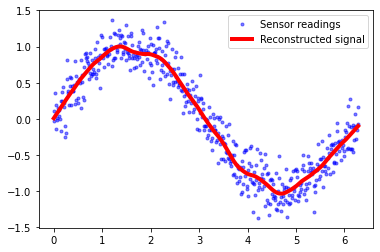

In [12]:
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5)
plt.plot(filtered[:, 0], filtered[:,1], 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Reconstructed signal'])
plt.show()